In [1]:
from keras.datasets import cifar100

(X_train, y_train), (X_test, y_test) = cifar100.load_data(label_mode = 'fine')

169009152/169001437 [==============================] - 11s 0us/step


In [2]:
print(X_train.shape, y_train.shape) 
print(X_test.shape, y_test.shape)

(50000, 32, 32, 3) (50000, 1)
(10000, 32, 32, 3) (10000, 1)


In [5]:
X_train = X_train.reshape((50000,  32, 32, 3))
X_test = X_test.reshape((10000,  32, 32, 3))

In [6]:
print(X_train.shape, y_train.shape) 
print(X_test.shape, y_test.shape)

(50000, 32, 32, 3) (50000, 1)
(10000, 32, 32, 3) (10000, 1)


In [7]:
from keras.utils import to_categorical

y_train= to_categorical(y_train)
y_test = to_categorical(y_test)

In [8]:
y_train.shape

(50000, 100)

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=2045)

In [29]:
X_train.shape, X_test.shape

((40000, 32, 32, 3), (10000, 32, 32, 3))

In [31]:
from keras.preprocessing.image import ImageDataGenerator

X_train_datagen = ImageDataGenerator(rescale= 1./255, rotation_range=40, width_shift_range=0.2, height_shift_range=0.2,
                                   shear_range=0.2, zoom_range=0.2, horizontal_flip=True, vertical_flip=True, 
                                   fill_mode='nearest')
X_valid_datagen = ImageDataGenerator(rescale= 1./255)

train_generator = X_train_datagen.flow(X_train, y_train, batch_size=1000)
valid_generator = X_valid_datagen.flow(X_valid, y_valid, batch_size=1000)

In [25]:
print(type(X_train_datagen))

<class 'tensorflow.python.keras.preprocessing.image.ImageDataGenerator'>


In [16]:
print(type(y_train))

<class 'numpy.ndarray'>


In [23]:

from keras import layers, models

model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
#model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(units=512, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(units=100, activation='softmax'))

model.summary()

model.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 11, 11, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 128)         0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 3, 3, 128)         147584    
_________________________________________________________________
flatten_1 (Flatten)          (None, 1152)             

In [30]:
print(40000/1000)
print(10000/1000)

40.0
10.0


In [32]:
%%time
Hist = model.fit(train_generator, steps_per_epoch=40 ,
                       epochs = 50,
                       batch_size = 128,
                       validation_data=valid_generator, validation_steps=10)

Epoch 1/50
40/40 [==============================] - 27s 641ms/step - loss: 4.1822 - accuracy: 0.0572 - val_loss: 3.9423 - val_accuracy: 0.0942
Epoch 2/50
40/40 [==============================] - 26s 656ms/step - loss: 4.0286 - accuracy: 0.0787 - val_loss: 3.7818 - val_accuracy: 0.1208
Epoch 3/50
40/40 [==============================] - 27s 665ms/step - loss: 3.8882 - accuracy: 0.0979 - val_loss: 3.6509 - val_accuracy: 0.1366
Epoch 4/50
40/40 [==============================] - 27s 664ms/step - loss: 3.8073 - accuracy: 0.1097 - val_loss: 3.5774 - val_accuracy: 0.1564
Epoch 5/50
40/40 [==============================] - 26s 658ms/step - loss: 3.7398 - accuracy: 0.1225 - val_loss: 3.5038 - val_accuracy: 0.1726
Epoch 6/50
40/40 [==============================] - 26s 655ms/step - loss: 3.6705 - accuracy: 0.1322 - val_loss: 3.4594 - val_accuracy: 0.1701
Epoch 7/50
40/40 [==============================] - 26s 648ms/step - loss: 3.6236 - accuracy: 0.1405 - val_loss: 3.4415 - val_accuracy: 0.1775

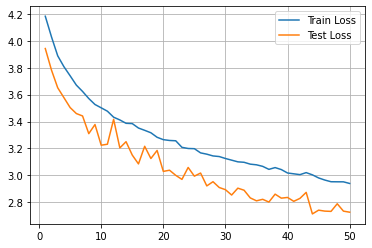

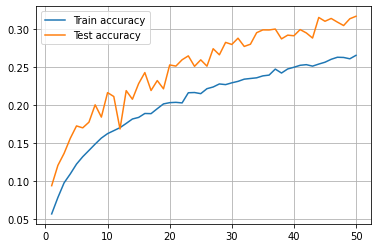

In [34]:
import matplotlib.pyplot as plt

epochs = range(1, len(Hist.history['loss'])+1)

plt.plot(epochs, Hist.history['loss'])
plt.plot(epochs, Hist.history['val_loss'])
plt.legend(['Train Loss', 'Test Loss'])
plt.grid()
plt.show()

plt.plot(epochs, Hist.history['accuracy'])
plt.plot(epochs, Hist.history['val_accuracy'])
plt.legend(['Train accuracy', 'Test accuracy'])
plt.grid()
plt.show()

In [36]:
test_datagen = ImageDataGenerator(rescale= 1./255)

test_generator = test_datagen.flow(X_test, y_test, batch_size=1000)

loss, accuracy = model.evaluate(test_generator, steps=22)
loss, accuracy

22/22 [==============================] - 1s 26ms/step - loss: 2.7390 - accuracy: 0.3118


(2.7389678955078125, 0.3118000030517578)